# Gravitational acceletarion in a pendulum experiment

In [71]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit


### Reading the data and saving it

In [72]:
path = "\\Users\\Teresa\\Desktop\\COMPU\\Clases_Filipa\\Clases_Filipa\\pendulo"
data = np.load(path + '\\datos.npy')
#print(np.shape(data))

# We make 2 vectors, one with the different lenghts and the other with the respective errors
l=data[:, 0].copy()
l_err=data[:, 1].copy()

# We make a matrix with the times for 10 oscillations, each row is a different oscillation lenght 
time=np.zeros((11,10))
for i in range(0,11):
   for j in range(2,12):
      time[i,j-2]=data[i,j]
      j+=1
   i=i+1

print(time)
#print(data) 
#print(l)

### We make a function that calculates the average of the time it takes to make 10 oscillations (two options)

[[20.05640437 20.05963423 20.02880293 20.04919752 20.05982868 20.11173776
  20.05356595 20.04985033 20.11175868 20.04829324]
 [21.03777478 21.04944117 21.02840233 21.06328741 21.04521451 21.02027374
  21.04115401 21.02989434 21.05528146 21.04242142]
 [21.93958408 21.97215824 22.00763047 21.99300118 21.98663794 21.98032397
  21.96255416 21.99397498 21.96471993 21.9828847 ]
 [22.86238279 22.87286153 22.88663756 22.90760653 22.86880205 22.86750249
  22.86246088 22.87985097 22.85209103 22.85472628]
 [23.75487852 23.73839293 23.74543798 23.77058917 23.75024196 23.744397
  23.73288188 23.75120172 23.75843325 23.72692261]
 [24.58795283 24.58688659 24.59157578 24.5610537  24.59750397 24.56669837
  24.57771734 24.58279614 24.57137225 24.5737635 ]
 [25.38105036 25.43665015 25.39019652 25.38059754 25.36748456 25.39635288
  25.38204713 25.37662751 25.39220239 25.37077851]
 [26.14205458 26.14853358 26.11334155 26.1595095  26.14412089 26.18612295
  26.1450315  26.17082307 26.15433138 26.14769478]
 [

In [ ]:
# First option: we make the average of the times from a vector of times, but I do not know what error to assign

def average_time1(t, n):
    """It calculates the average of a vector t of n components

    Args:
        t (array): vector of n components
        n (int): dimension of the vector

    Returns:
        float: average of the vector t
    """

    average = 0
    desvest = 0
    for i in range(0, n):
        average += t[i]
    
    desvest = np.std(t)/np.sqrt(10)
    result = [average / n, desvest]
    return result


print(average_time1(time[0, :], 10)[0], average_time1(time[0, :], 10)[1])


20.062907369751297 0.008158267229214053
[0.00081583 0.00038894 0.00058187 0.00049503 0.00038236 0.00034822
 0.00058658 0.00057515 0.00056948 0.00051803 0.00084383]


### We plot the period as a function of its length

[0.00081583 0.00038894 0.00058187 0.00049503 0.00038236 0.00034822
 0.00058658 0.00057515 0.00056948 0.00051803 0.00084383]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


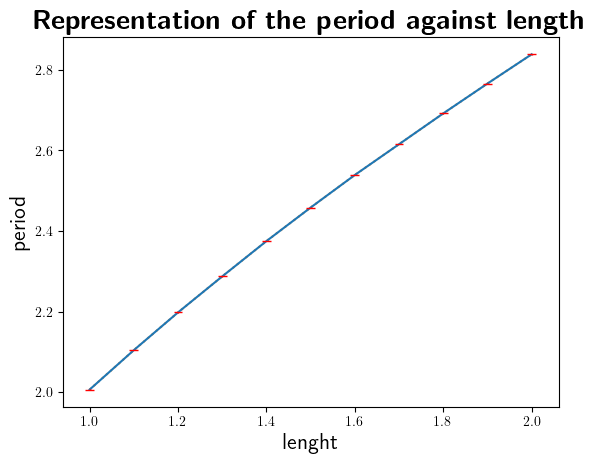

In [77]:
# To do this, we need to get the period for each length and its error in two separate vectors (for simplicity)

p=np.zeros(11)
p_err=np.zeros(11)
for i in range(0,11):
    for j in range(0,10):
    
        p[i]=average_time1(time[i,:],10)[0]/10
        p_err[i]=average_time1(time[i,:],10)[1]/10
        j +=1
    i + 1

# Now we plot the period 
print(p_err)
print(l_err)


plt.rcParams['text.usetex'] = True  

plt.plot(l,p, label = r'period')
plt.xlabel(r'lenght', fontsize = 16)           
plt.ylabel(r'period', fontsize = 16)                             
plt.title(r'\textbf{Representation of the period against length}', fontsize = 20)

# Now we make the error bars
x_err=l_err
y_err=p_err
plt.errorbar(l, p, xerr = x_err, yerr = y_err, ecolor= 'r', elinewidth = 1, 
            barsabove=True, linestyle = 'dotted')

plt.show()

### Now we make a mean square fit to the data to get the value of g with its error.

The value for g = 9.80562  $\pm$ 0.00139


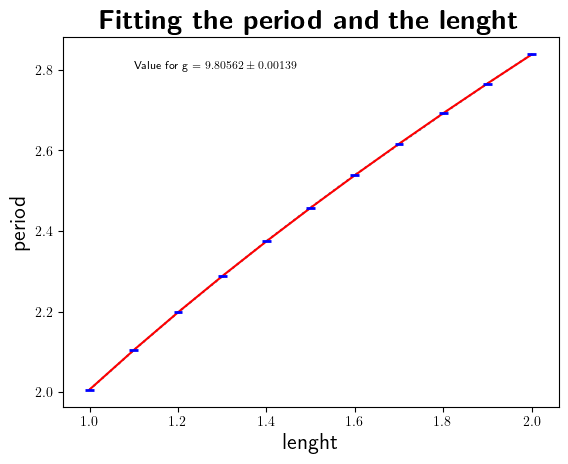

In [113]:
# We make the function to which we will fit the data and we fit it using the function curve_fit
def funcion(x, m):
    return 2*np.pi*np.sqrt(x/m)



popt, pcov = curve_fit(funcion, l, p, sigma=p_err)


# We take out the fitted value for g
g = popt[0]
g_err = np.sqrt(pcov[0,0]) # Even if I only have one element in those arrays, it good to take the values like this so that they are floats
print(rf'The value for g = {g:.5f}', r' $\pm$', rf'{g_err:.5f}')


# Plotting the values and the fitted function and the errors
#plt.scatter(l, p, label='Experimental data')
plt.plot(l, funcion(l, g), color='red')

x_err=l_err
y_err=p_err
plt.errorbar(l, p, xerr = x_err, yerr = y_err, ecolor= 'b', elinewidth = 2, 
            barsabove=True, linestyle = 'dotted')

plt.xlabel(r'lenght', fontsize = 16)           
plt.ylabel(r'period', fontsize = 16)                             
plt.title(r'\textbf{Fitting the period and the lenght}', fontsize = 20)

plt.text(1.1, 2.8, rf'Value for g = ${g:.5f} \pm {g_err:.5f}$', fontsize=8, color='black')

plt.show()